# [KDNUGGETS](https://www.kdnuggets.com/2021/11/guide-word-embedding-techniques-nlp.html)<br>
### TF-IDF — Term Frequency-Inverse Document Frequency: 
The text can be in the form of a document or various documents (corpus). It is a combination of two metrics: Term Frequency (TF) and Inverse Document Frequency (IDF).<br><br>
TF counts number of the words in the document. Where i is occurance of a word, j is the words in the document TF can be shown as following:
$$TF(i) =   \frac{\log(Frequency(i,j))}{\log(TotalNumber(j))}$$
<br><br>
IDF is rarity of the words. Words that are rarely used in the corpus may hold significant information. Where d is documents and i is occurance of a word, IDF can be showed as following:

$$IDF (i) = \log (\frac{TotalNumber(d)}{Frequency(d,i)})$$

### Word2Vec:
Word2Vec uses cosine similarity metric. If the cosine angle is 0 and cosine value is 1, that means words are overlapping. If the cosine angle is 90 and cosine value is 0, that means words are independent or hold no contextual similarity. Word2Vec offers two neural network-based variants: Continuous Bag of Words (CBOW) and Skip-gram.

In CBOW, the neural network model takes various words as input and predicts the target word that is closely related to the context of the input words. On the other hand, the Skip-gram architecture takes one word as input and predicts its closely related context words.

Skip-gram <br>

$$ P (w_o | w_c) = \frac{e^{u_o^\intercal v_c}}{\sum e^{u_i^\intercal v_c}}$$

<br>
Word2Vec only captures the local context of words 

![CBOW vs Skip-gram](https://www.kdnuggets.com/wp-content/uploads/nlp-cbow-skip-gram.jpg)

Although one-hot word vectors are easy to construct, they are usually not a good choice. A main reason is that one-hot word vectors cannot accurately express the similarity between different words, such as the cosine similarity that we often use. 


### GloVe — Global Vectors for Word Representation
GloVe considers the entire corpus and creates a large matrix that can capture the co-occurrence of words within the corpus. GloVe combines two-word vector learning methods: matrix factorization and local context window method. GloVe technique has a simpler least square cost or error function that reduces the computational cost of training the model. The resulting word embeddings are different and improved.

![GloVe](https://www.kdnuggets.com/wp-content/uploads/nlp-glove-embedding-example.jpg)


### BERT — Bidirectional Encoder Representations from Transformers
BERT-Base has 110 million parameters, and BERT-Large has 340 million parameters. During the training process, embeddings are refined by passing through each BERT encoder layer. For each word, the attention mechanism captures word associations based on the words on the left and the words on the right. Word embeddings are also positionally encoded to keep track of the pattern or position of each word in a sentence. Google search engine uses BERT.

BERT further improved the state of the art on eleven natural language processing tasks under broad categories of (i) single text classification (e.g., sentiment analysis), (ii) text pair classification (e.g., natural language inference), (iii) question answering, (iv) text tagging (e.g., named entity recognition). All proposed in 2018, from context-sensitive ELMo to task-agnostic GPT and BERT, conceptually simple yet empirically powerful pretraining of deep representations for natural languages have revolutionized solutions to various natural language processing tasks.


Masked Language Modeling
a language model predicts a token using the context on its left. To encode context bidirectionally for representing each token, BERT randomly masks tokens and uses tokens from the bidirectional context to predict the masked tokens in a self-supervised fashion. This task is referred to as a masked language model.

- a special “mask” token for 80% of the time (e.g., “this movie is great” becomes “this movie is mask”);
- a random token for 10% of the time (e.g., “this movie is great” becomes “this movie is drink”);
- the unchanged label token for 10% of the time (e.g., “this movie is great” becomes “this movie is great”).

Note that for 10% of 15% time a random token is inserted. This occasional noise encourages BERT to be less biased towards the masked token (especially when the label token remains unchanged) in its bidirectional context encoding.

Next Sentence Prediction
Although masked language modeling is able to encode bidirectional context for representing words, it does not explicitly model the logical relationship between text pairs. To help understand the relationship between two text sequences, BERT considers a binary classification task, next sentence prediction, in its pretraining. When generating sentence pairs for pretraining, for half of the time they are indeed consecutive sentences with the label “True”; while for the other half of the time the second sentence is randomly sampled from the corpus with the label “False”.

# Hierarchial Softmax

![image.png](https://d2l.ai/_images/hi-softmax.svg)

## WORD2VEC Application

### Libraries

In [2]:
import gensim
from gensim.models import word2vec
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.downloader as api
import numpy as np
from urllib.request import urlopen
import re
from nltk.corpus import stopwords
import pandas as pd



### Importing the data


In [3]:

def data_tokenizer(url, language, encoding = 'utf-8'):
    with urlopen(url) as file:
        divine_comedy = file.read().decode(encoding)

    f = divine_comedy.replace("\n", " ")    
    f = re.sub(r'[^\w\s]', '', f)
    data = []
    for i in sent_tokenize(f):
        temp = []
     
    # tokenize the sentence into words
        for j in word_tokenize(i):
            temp.append(j.lower())
 
        data.append(temp)

    stop_words = set(stopwords.words(language))
    stopped = [[i for i in j if i not in stop_words] for j in data]
    return stopped
 

In [4]:
english = data_tokenizer('https://www.gutenberg.org/files/8800/8800-0.txt','english')
spanish = data_tokenizer('https://www.gutenberg.org/cache/epub/57303/pg57303.txt','spanish')
finnish = data_tokenizer('https://www.gutenberg.org/cache/epub/10941/pg10941.txt','finnish')

In [5]:
def w2v(language):
    return gensim.models.Word2Vec(language, min_count = 1,
                              vector_size = 100, window = 5).wv

In [6]:
eng_model = w2v(english)
spa_model = w2v(spanish)
finn_model = w2v(finnish)

In [7]:
print(eng_model.index_to_key[:10])
print(spa_model.index_to_key[:10])
print(finn_model.index_to_key[:10])

['thou', 'thy', 'one', 'thus', 'thee', 'yet', 'us', 'may', 'hath', 'first']
['si', 'tan', 'así', 'hacia', 'aquel', 'después', 'pues', 'aquí', 'modo', 'ojos']
['ma', 'mi', 'the', 'mut', 'näin', 'sa', 'of', 'mun', 'jo', 'mua']


In [8]:
eng_model.most_similar('virgil')

[('unfolds', 0.3734283447265625),
 ('faultering', 0.36855417490005493),
 ('hastend', 0.36685967445373535),
 ('lording', 0.3666694164276123),
 ('drives', 0.35370489954948425),
 ('lighteth', 0.35342586040496826),
 ('virus', 0.3429449796676636),
 ('deceived', 0.3338145911693573),
 ('renews', 0.32927262783050537),
 ('adamant', 0.32708269357681274)]

In [9]:
virgil = eng_model.most_similar('virgil')
print(virgil)

[('unfolds', 0.3734283447265625), ('faultering', 0.36855417490005493), ('hastend', 0.36685967445373535), ('lording', 0.3666694164276123), ('drives', 0.35370489954948425), ('lighteth', 0.35342586040496826), ('virus', 0.3429449796676636), ('deceived', 0.3338145911693573), ('renews', 0.32927262783050537), ('adamant', 0.32708269357681274)]


In [10]:
virgilio = spa_model.most_similar('virgilio')
print(virgilio)

[('endrino', 0.34873276948928833), ('fácilmente', 0.34670668840408325), ('ein', 0.34319353103637695), ('guiarlo', 0.3390248119831085), ('sabiendo', 0.3371031582355499), ('cefas', 0.33437660336494446), ('hilaridad', 0.33384791016578674), ('revoluciones', 0.33092066645622253), ('gustar', 0.31603318452835083), ('disipó', 0.315613716840744)]


In [11]:
vergilius = finn_model.most_similar('vergilius')
print(vergilius)

[('vihattavampi', 0.35653144121170044), ('oikeahan', 0.33926820755004883), ('saastainen', 0.33610737323760986), ('hietaa', 0.3302060663700104), ('harjaa', 0.3231929838657379), ('katso', 0.3189132511615753), ('uuvuttakoon', 0.3186068534851074), ('ghibelliinisukuja', 0.3171890377998352), ('selittäkää', 0.31103986501693726), ('johtajalleen', 0.3078393042087555)]


In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def model_pca(model):
    vocab = list(model.index_to_key[:200])
    vectors = model[vocab]
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)
    return vectors_2d
    

In [13]:
eng_pca = model_pca(eng_model)
spa_pca = model_pca(spa_model)
finn_pca = model_pca(finn_model)

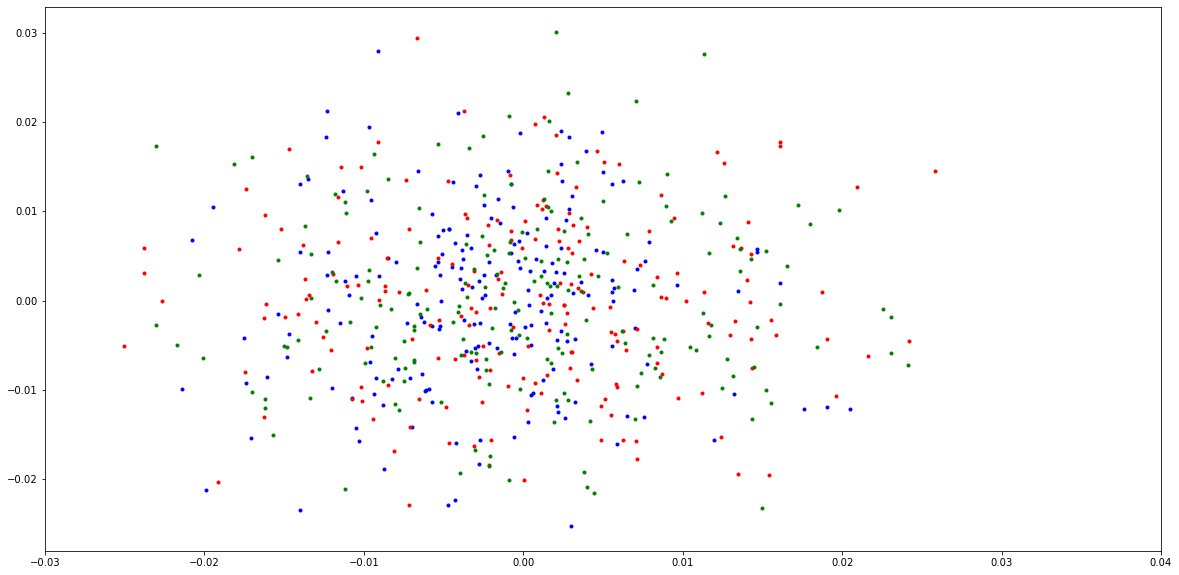

In [14]:

def plot(model, color = 'blue'):
    plt.xlim(left = -0.03, right = 0.04)
    plt.scatter(model[:, 0], model[:, 1], marker=".",c= color)
plt.figure(figsize=(20,10))
plot(eng_pca,'blue')
plot(spa_pca,'red')
plot(finn_pca,'green')
plt.show()

In [15]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np              
def tsne_fit(model):
    tsne = TSNE(n_components=2, random_state=0)
    vectors = tsne.fit_transform(model)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals

In [16]:
x_eng,y_eng = tsne_fit(eng_pca)
x_spa,y_spa = tsne_fit(spa_pca)
x_finn,y_finn = tsne_fit(finn_pca)

In [17]:
def plot_function(x_vals, y_vals,color):
 plt.scatter(x_vals, y_vals, c= color)


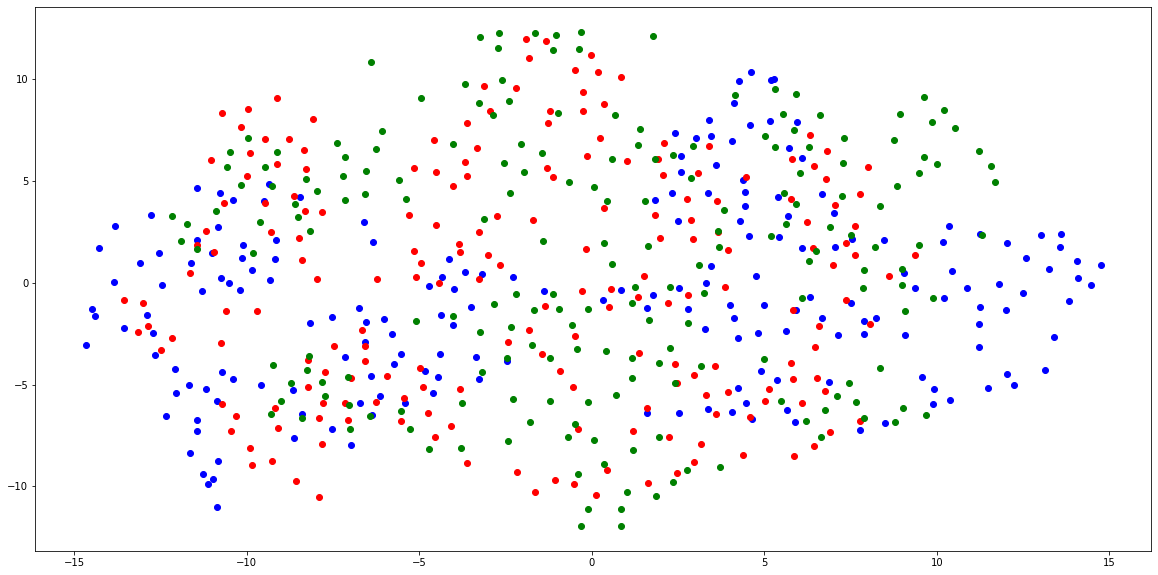

In [18]:
plt.figure(figsize=(20,10))
plot_function(x_eng, y_eng,'blue')
plot_function(x_spa,y_spa,'red')
plot_function(x_finn,y_finn,'green')

plt.show()

In [19]:

from numpy.linalg import norm
def cosine_similarity(A,B): 
    cosine_Distance = (A*B).sum(axis=1) / (A*A).sum(axis=1) ** .5 / (B*B).sum(axis=1) ** .5
    


In [20]:
import numpy as np

In [35]:
v_eng = eng_model.vectors.flatten()[:50].reshape(-1,1)
v_spa = spa_model.vectors.flatten()[:50].reshape(-1,1)
v_finn = finn_model.vectors.flatten()[:50].reshape(-1,1)

In [38]:
v_eng

array([[-0.0014333 ],
       [ 0.00508389],
       [ 0.00359299],
       [ 0.01123816],
       [-0.00853479],
       [-0.01195006],
       [ 0.00691185],
       [ 0.01892005],
       [-0.00612212],
       [-0.00629783],
       [ 0.00836011],
       [-0.00692435],
       [-0.00538861],
       [ 0.00737281],
       [-0.00438887],
       [-0.00423114],
       [ 0.00273311],
       [-0.00498649],
       [-0.00844684],
       [-0.01621137],
       [ 0.00838193],
       [ 0.00381965],
       [ 0.0105636 ],
       [-0.00028334],
       [ 0.00520994],
       [-0.0037998 ],
       [-0.00254779],
       [ 0.00598168],
       [-0.00950924],
       [-0.00215894],
       [-0.00336891],
       [-0.00245706],
       [ 0.01145225],
       [-0.01136167],
       [-0.00531526],
       [ 0.00127293],
       [ 0.00850476],
       [-0.00852246],
       [-0.0022097 ],
       [-0.01158415],
       [-0.01443081],
       [ 0.00180541],
       [-0.00982916],
       [-0.0052489 ],
       [ 0.00238028],
       [-0

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(eng_pca,spa_pca,finn_pca)
similarity.shape

(200, 200)

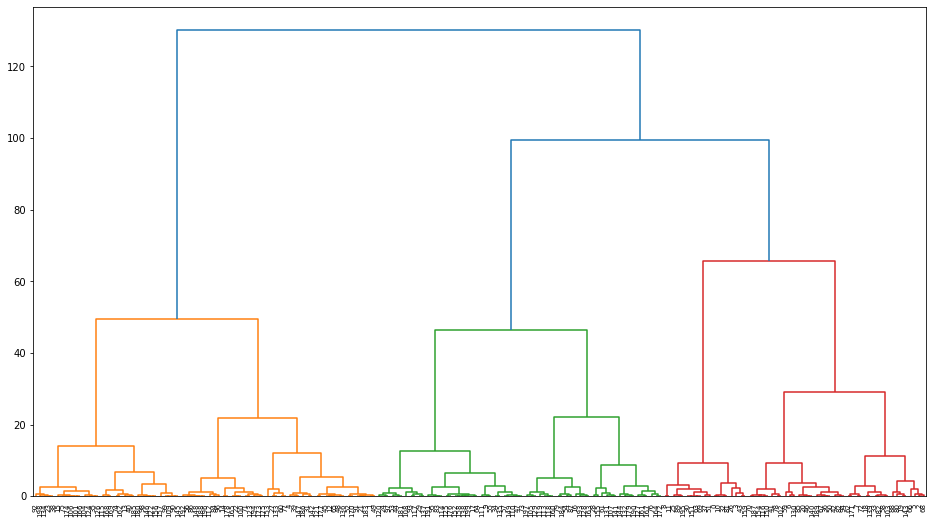

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity,'ward')

plt.figure(figsize=(16, 9))
dendrogram(Z, leaf_rotation=90, leaf_font_size=7.)
plt.show()

Same procedure first 500 vectors

In [25]:
v_eng1 = eng_model.vectors[:500]
v_spa1 = spa_model.vectors[:500]
v_finn1 = finn_model.vectors[:500]

In [49]:
similarity1 = cosine_similarity(eng_pca[:50],spa_pca[:50],finn_pca[:50])
similarity1.shape

(50, 50)

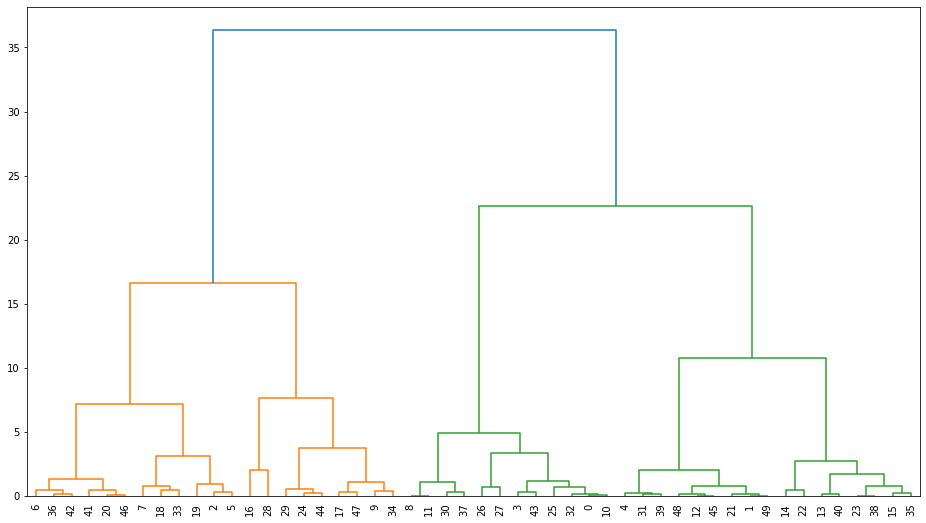

In [50]:
Z1 = linkage(similarity1,'ward')

plt.figure(figsize=(16, 9))
dendrogram(Z1, leaf_rotation=90, leaf_font_size=10.)
plt.show()